# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [49]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [50]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

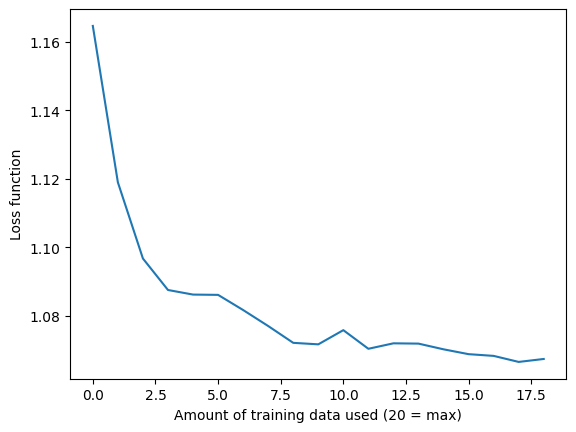

In [51]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [52]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

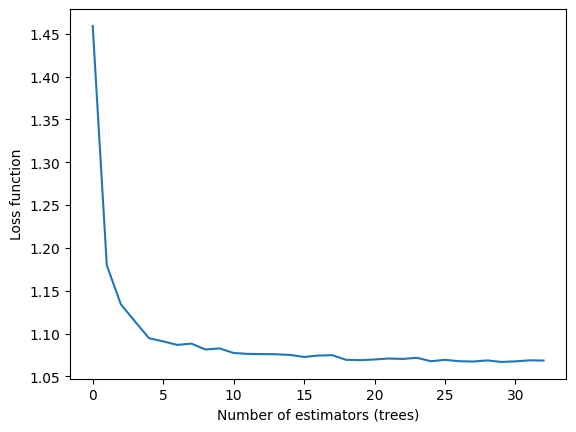

In [53]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

Between these two graphs, I would cut the "number of estimators" plot. Our goal is to learn the model's behavior; the "amount of training data used" graph provides insight into determining if the model is under/overfitting, if adding more data will improve its performance, and if the model plateaued (i.e. if it no longer provides insightful results). The "number of estimators" plot is useful in determining the complexity of the graph; how does the model change when we add more trees. However, random forests benefit when there are more trees (to a point - it eventually stabilizes) so this graph is important but not as insightful as the training data one which is giving us more important analysis regarding the model itself. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [54]:
# Dataset 1: Video_review

df_video_review = pd.read_csv('video_review.csv')
df_video_review.columns

Index(['Season_Year', 'GameKey', 'PlayID', 'GSISID', 'Player_Activity_Derived',
       'Turnover_Related', 'Primary_Impact_Type', 'Primary_Partner_GSISID',
       'Primary_Partner_Activity_Derived', 'Friendly_Fire'],
      dtype='object')

In [55]:
# Dataset 1: Video_review RF and Cross-Validation
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_video_review = df_video_review.drop('Primary_Impact_Type', axis=1)
y_video_review = df_video_review['Primary_Impact_Type']
X_video_review = pd.get_dummies(X_video_review, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_video_review, y_video_review, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf, X_video_review, y_video_review, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation of accuracy: ", cv_scores.std())



/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.25       0.25       0.28571429 0.57142857 0.42857143]
Mean accuracy:  0.35714285714285715
Standard deviation of accuracy:  0.12576297758327862


In [56]:
# Dataset 1: Video_review Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:
# Dataset 1: Video_review Performance Evaluation

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))



Test Accuracy: 0.5


In [58]:
# Dataset 2: pffScoutingData
df_pff = pd.read_csv('pffScoutingData.csv')
df_pff.columns


Index(['gameId', 'playId', 'nflId', 'pff_role', 'pff_positionLinedUp',
       'pff_hit', 'pff_hurry', 'pff_sack', 'pff_beatenByDefender',
       'pff_hitAllowed', 'pff_hurryAllowed', 'pff_sackAllowed',
       'pff_nflIdBlockedPlayer', 'pff_blockType', 'pff_backFieldBlock'],
      dtype='object')

In [59]:
# Dataset 2: pffScoutingData RF and Cross-Validation

y_pff = df_pff['pff_role']
X_pff = df_pff.drop('pff_role', axis=1)
X_pff = pd.get_dummies(X_pff, drop_first=True)

X_train_pff, X_test_pff, y_train_pff, y_test_pff = train_test_split(X_pff, y_pff, test_size=0.2, random_state=42)

rf_pff = RandomForestClassifier(random_state=42)

cv_scores_pff = cross_val_score(rf_pff, X_pff, y_pff, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores_pff)
print("Mean accuracy: ", cv_scores_pff.mean())
print("Standard deviation of accuracy: ", cv_scores_pff.std())

Cross-validation scores: [0.96799554 0.96547236 0.96895169 0.97081087 0.97078353]
Mean accuracy:  0.9688027982445753
Standard deviation of accuracy:  0.0019860150497409204


In [60]:
# Dataset 2: pffScoutingData Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

grid_search_pff = GridSearchCV(rf_pff, param_grid, cv=5, scoring='accuracy')
grid_search_pff.fit(X_train_pff, y_train_pff)

print("Best hyperparameters:", grid_search_pff.best_params_)



Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [61]:
# Dataset 2: pffScoutingData Performance Evaluation
from sklearn.metrics import accuracy_score

best_rf_pff = grid_search_pff.best_estimator_
y_pred_pff = best_rf_pff.predict(X_test_pff)  

print("Test Accuracy:", accuracy_score(y_test_pff, y_pred_pff))



Test Accuracy: 0.9738917957026374


In [62]:
# Dataset 3: InjuryRecord
file_path = 'InjuryRecord.csv'
df_injury = pd.read_csv(file_path)
df_injury.columns


Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

In [63]:
# Dataset 3: InjuryRecord RF and Cross-Validation

y_injury_record = df_injury['Surface']
X_injury_record = df_injury.drop('Surface', axis=1)

X_injury_record = pd.get_dummies(X_injury_record, drop_first=True)

X_train_injury, X_test_injury, y_train_injury, y_test_injury = train_test_split(X_injury_record, y_injury_record, test_size=0.2, random_state=42)

rf_injury = RandomForestClassifier(random_state=42)
cv_scores_injury = cross_val_score(rf_injury, X_injury_record, y_injury_record, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores_injury)
print("Mean accuracy:", cv_scores_injury.mean())
print("Standard deviation of accuracy:", cv_scores_injury.std())


Cross-validation scores: [0.33333333 0.66666667 0.47619048 0.33333333 0.57142857]
Mean accuracy: 0.47619047619047616
Standard deviation of accuracy: 0.1312766547818116


In [64]:
# Dataset 3: InjuryRecord Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_injury = RandomForestClassifier(random_state=42)

grid_search_injury = GridSearchCV(rf_injury, param_grid, cv=5, scoring='accuracy')

grid_search_injury.fit(X_train_injury, y_train_injury)

print("Best hyperparameters:", grid_search_injury.best_params_)




Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [65]:
# Dataset 3: InjuryRecord Performance Evaluation

best_rf_injury = grid_search_injury.best_estimator_
y_pred_injury = best_rf_injury.predict(X_test_injury)

from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test_injury, y_pred_injury))

Test Accuracy: 0.5714285714285714


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

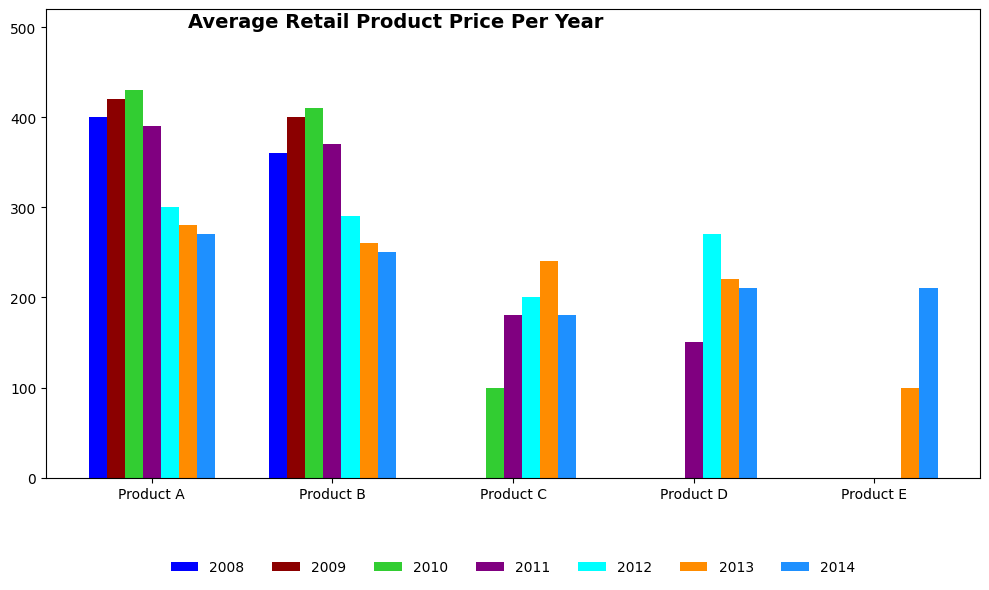

In [66]:
years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014']
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
data = {
    '2008': [400, 360, 0, 0, 0],
    '2009': [420, 400, 0, 0, 0],
    '2010': [430, 410, 100, 0, 0],
    '2011': [390, 370, 180, 150, 0],
    '2012': [300, 290, 200, 270, 0],
    '2013': [280, 260, 240, 220, 100],
    '2014': [270, 250, 180, 210, 210]
}

bar_width = 0.1
x = np.arange(len(products))

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['blue', 'darkred', 'limegreen', 'purple', 'cyan', 'darkorange', 'dodgerblue']

for i, year in enumerate(years):
    prices = data[year]
    ax.bar(x + i * bar_width, prices, width=bar_width, label=year, color=colors[i])

ax.set_xticks(x + bar_width * 3)
ax.set_xticklabels(products)

ax.text(0.5, 500, 'Average Retail Product Price Per Year',
        fontsize=14, fontweight='bold', ha='left', transform=ax.transData)


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=7, frameon=False)

plt.ylim(0, 520)  
plt.tight_layout()
plt.show()
